The strengths of hierarchical clustering methods include the following:

They often reveal the finer details about the relationships between data objects.
They provide an interpretable dendrogram.
The weaknesses of hierarchical clustering methods include the following:

They’re computationally expensive with respect to algorithm complexity.
They’re sensitive to noise and outliers.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The strengths of density-based clustering methods include the following:

They excel at identifying clusters of nonspherical shapes.
They’re resistant to outliers.
The weaknesses of density-based clustering methods include the following:

They aren’t well suited for clustering in high-dimensional spaces.
They have trouble identifying clusters of varying densities.

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Resources/allzipcodes_collision_weather_df.csv',dtype={'vehicle_type_code_1': 'str','vehicle_type_code_2': 'str','vehicle_type_code_3': 'str','vehicle_type_code_4': 'str',})

In [24]:
df.head()

row_id       crash_datetime  crash_day_of_week  \
0  10044_2022-03-26  2022-03-26 11:45:00                  5   
1  10465_2022-06-29  2022-06-29 06:55:00                  2   
2  11211_2022-06-29  2022-06-29 16:00:00                  2   
3  11225_2022-07-12  2022-07-12 17:50:00                  1   
4  11225_2022-03-23  2022-03-23 10:00:00                  2   

  crash_hour_category                    street_address  \
0         Other Hours           Queensboro Bridge Upper   
1       Early Morning                Throgs Neck Bridge   
2          Rush Hours  Williamsburg Bridge Outer Roadwa   
3          Rush Hours               44 Empire Boulevard   
4         Other Hours                     71 East Drive   

   number_of_persons_injured  number_of_persons_killed  \
0                          1                         0   
1                          0                         0   
2                          1                         0   
3                          0                         0   
4                          0                         0   

   number_of_pedestrians_injured  number_of_pedestrians_killed  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   number_of_cyclist_injured  ...  windspeed  visibility  severerisk sunrise  \
0                          0  ...       14.2         9.9        10.0   06:49   
1                          0  ...       14.6         9.8        30.0   05:27   
2                          0  ...       14.6         9.8        30.0   05:27   
3                          0  ...       14.5         9.9        60.0   05:35   
4                          0  ...       17.7         9.9        10.0   06:54   

  sunset    icon  temperature_category  precip_category  humid_category  \
0  19:14    rain              Moderate            Light            High   
1  20:31    rain                  Warm            Light            High   
2  20:31    rain                  Warm            Light            High   
3  20:27  cloudy                  Warm              Dry            High   
4  19:11    rain              Moderate            Light             Low   

       wind_level  
0  Leaves scatter  
1  Leaves scatter  
2  Leaves scatter  
3  Leaves scatter  
4  Leaves scatter  

[5 rows x 47 columns]

In [25]:
df.columns

Index(['row_id', 'crash_datetime', 'crash_day_of_week', 'crash_hour_category',
       'street_address', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'borough', 'zip_code', 'latitude', 'longitude',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'Population',
       'contributing_factor', 'number_of_injuries', 'number_of_deaths',
       'injuries_rate', 'death_rate', 'severity_of_accident', 'date', 'hour',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'sunrise', 'sunset',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103782 entries, 0 to 103781
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   row_id                         103782 non-null  object 
 1   crash_datetime                 103782 non-null  object 
 2   crash_day_of_week              103782 non-null  int64  
 3   crash_hour_category            103782 non-null  object 
 4   street_address                 103780 non-null  object 
 5   number_of_persons_injured      103782 non-null  int64  
 6   number_of_persons_killed       103782 non-null  int64  
 7   number_of_pedestrians_injured  103782 non-null  int64  
 8   number_of_pedestrians_killed   103782 non-null  int64  
 9   number_of_cyclist_injured      103782 non-null  int64  
 10  number_of_cyclist_killed       103782 non-null  int64  
 11  number_of_motorist_injured     103782 non-null  int64  
 12  number_of_motorist_killed     

In [27]:
df.groupby('contributing_factor').size()

contributing_factor
Accelerator Defective                                       62
Aggressive Driving/Road Rage                               803
Alcohol Involvement                                       1788
Animals Action                                              85
Backing Unsafely                                          3198
Brakes Defective                                           447
Cell Phone (hand-Held)                                      44
Cell Phone (hands-free)                                      3
Driver Inattention/Distraction                           25825
Driver Inexperience                                       1877
Driverless/Runaway Vehicle                                 101
Drugs (illegal)                                             81
Eating or Drinking                                          10
Failure to Keep Right                                      111
Failure to Yield Right-of-Way                             7411
Fatigued/Drowsy                    

In [48]:
df1 = df[['row_id','latitude', 'longitude','crash_hour_category',
     'contributing_factor', 'number_of_deaths',
       'number_of_injuries',
       'severity_of_accident',
       'humidity', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk',
       'icon', 'temperature_category', 'precip_category', 'humid_category',
       'wind_level']]
df1.head()

row_id   latitude  longitude crash_hour_category  \
0  10044_2022-03-26  40.756929 -73.954755         Other Hours   
1  10465_2022-06-29  40.805080 -73.793780       Early Morning   
2  11211_2022-06-29  40.713595 -73.971962          Rush Hours   
3  11225_2022-07-12  40.663303 -73.960490          Rush Hours   
4  11225_2022-03-23  40.661927 -73.964893         Other Hours   

                                 contributing_factor  number_of_deaths  \
0                                  Pavement Slippery                 0   
1                              Following Too Closely                 0   
2                     Driver Inattention/Distraction                 0   
3                                  Oversized Vehicle                 0   
4  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 0   

   number_of_injuries severity_of_accident  humidity  preciptype  snow  \
0                   2        Serious (Low)      53.5           1     0   
1                   0                Minor      57.2           1     0   
2                   2        Serious (Low)      57.2           1     0   
3                   0                Minor      66.8           0     0   
4                   0                Minor      46.7           1     0   

   windspeed  visibility  severerisk    icon temperature_category  \
0       14.2         9.9        10.0    rain             Moderate   
1       14.6         9.8        30.0    rain                 Warm   
2       14.6         9.8        30.0    rain                 Warm   
3       14.5         9.9        60.0  cloudy                 Warm   
4       17.7         9.9        10.0    rain             Moderate   

  precip_category humid_category      wind_level  
0           Light           High  Leaves scatter  
1           Light           High  Leaves scatter  
2           Light           High  Leaves scatter  
3             Dry           High  Leaves scatter  
4           Light            Low  Leaves scatter

In [49]:
df1.groupby('severity_of_accident').size()

severity_of_accident
Fatal                 268
Minor               64485
Serious (High)        357
Serious (Low)       36350
Serious (Medium)     2314
Very Fatal              8
dtype: int64

In [50]:
#ordinal encoding for 'precip_category'
precip_mapping = {
    'Dry': 1,        # Assuming 'Dry' as the baseline (lowest)
    'Light': 2,      # More intense than 'Dry'
    'Moderate': 3,   # More intense than 'Light'
    'Heavy': 4       # The most intense category
}

df1['precip_category_encoded'] = df1['precip_category'].map(precip_mapping)

#################################################################################
#ordinal encoding for 'crash_hour_category'
crash_hour_category_mapping = {
    'Early Morning': 1,
    'Late Night': 2,
    'Other Hours': 3,
    'Rush Hours': 4
}

# Apply the mapping to the 'crash_hour_category' column
df1['crash_hour_category_encoded'] = df1['crash_hour_category'].map(crash_hour_category_mapping)

#################################################################################
#ordinal encoding for 'crash_hour_category'
severity_category_mapping = {
    'Minor': 1,
    'Serious (Low)': 2,
    'Serious (Medium)': 3,
    'Serious (High)': 4,
    'Fatal': 5,
    'Very Fatal': 6
    
}

# Apply the mapping to the 'crash_hour_category' column
df1['severity_category_encoded'] = df1['severity_of_accident'].map(severity_category_mapping)




<ipython-input-50-416882e1a1b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['precip_category_encoded'] = df1['precip_category'].map(precip_mapping)
<ipython-input-50-416882e1a1b0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['crash_hour_category_encoded'] = df1['crash_hour_category'].map(crash_hour_category_mapping)
<ipython-input-50-416882e1a1b0>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [51]:
df1.head()

row_id   latitude  longitude crash_hour_category  \
0  10044_2022-03-26  40.756929 -73.954755         Other Hours   
1  10465_2022-06-29  40.805080 -73.793780       Early Morning   
2  11211_2022-06-29  40.713595 -73.971962          Rush Hours   
3  11225_2022-07-12  40.663303 -73.960490          Rush Hours   
4  11225_2022-03-23  40.661927 -73.964893         Other Hours   

                                 contributing_factor  number_of_deaths  \
0                                  Pavement Slippery                 0   
1                              Following Too Closely                 0   
2                     Driver Inattention/Distraction                 0   
3                                  Oversized Vehicle                 0   
4  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 0   

   number_of_injuries severity_of_accident  humidity  preciptype  ...  \
0                   2        Serious (Low)      53.5           1  ...   
1                   0                Minor      57.2           1  ...   
2                   2        Serious (Low)      57.2           1  ...   
3                   0                Minor      66.8           0  ...   
4                   0                Minor      46.7           1  ...   

   visibility  severerisk    icon  temperature_category precip_category  \
0         9.9        10.0    rain              Moderate           Light   
1         9.8        30.0    rain                  Warm           Light   
2         9.8        30.0    rain                  Warm           Light   
3         9.9        60.0  cloudy                  Warm             Dry   
4         9.9        10.0    rain              Moderate           Light   

  humid_category      wind_level precip_category_encoded  \
0           High  Leaves scatter                       2   
1           High  Leaves scatter                       2   
2           High  Leaves scatter                       2   
3           High  Leaves scatter                       1   
4            Low  Leaves scatter                       2   

  crash_hour_category_encoded  severity_category_encoded  
0                           3                          2  
1                           1                          1  
2                           4                          2  
3                           4                          1  
4                           3                          1  

[5 rows x 22 columns]

In [52]:
df1.columns

Index(['row_id', 'latitude', 'longitude', 'crash_hour_category',
       'contributing_factor', 'number_of_deaths', 'number_of_injuries',
       'severity_of_accident', 'humidity', 'preciptype', 'snow', 'windspeed',
       'visibility', 'severerisk', 'icon', 'temperature_category',
       'precip_category', 'humid_category', 'wind_level',
       'precip_category_encoded', 'crash_hour_category_encoded',
       'severity_category_encoded'],
      dtype='object')

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to be scaled
columns_to_scale = ['precip_category_encoded','crash_hour_category_encoded','severity_category_encoded']

# Fit and transform the scaler on the selected columns
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

# # Display the scaled DataFrame
# df.head()
# # Fit and transform the scaler on your data
# scaled_features = scaler.fit_transform(df1[['precip_category_encoded','crash_hour_category_encoded']])
# df1['precip_category_encoded'] = scaled_features

<ipython-input-53-4d22e253c6e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])


In [54]:
df1.head()

row_id   latitude  longitude crash_hour_category  \
0  10044_2022-03-26  40.756929 -73.954755         Other Hours   
1  10465_2022-06-29  40.805080 -73.793780       Early Morning   
2  11211_2022-06-29  40.713595 -73.971962          Rush Hours   
3  11225_2022-07-12  40.663303 -73.960490          Rush Hours   
4  11225_2022-03-23  40.661927 -73.964893         Other Hours   

                                 contributing_factor  number_of_deaths  \
0                                  Pavement Slippery                 0   
1                              Following Too Closely                 0   
2                     Driver Inattention/Distraction                 0   
3                                  Oversized Vehicle                 0   
4  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 0   

   number_of_injuries severity_of_accident  humidity  preciptype  ...  \
0                   2        Serious (Low)      53.5           1  ...   
1                   0                Minor      57.2           1  ...   
2                   2        Serious (Low)      57.2           1  ...   
3                   0                Minor      66.8           0  ...   
4                   0                Minor      46.7           1  ...   

   visibility  severerisk    icon  temperature_category precip_category  \
0         9.9        10.0    rain              Moderate           Light   
1         9.8        30.0    rain                  Warm           Light   
2         9.8        30.0    rain                  Warm           Light   
3         9.9        60.0  cloudy                  Warm             Dry   
4         9.9        10.0    rain              Moderate           Light   

  humid_category      wind_level precip_category_encoded  \
0           High  Leaves scatter                0.216152   
1           High  Leaves scatter                0.216152   
2           High  Leaves scatter                0.216152   
3           High  Leaves scatter               -0.800188   
4            Low  Leaves scatter                0.216152   

  crash_hour_category_encoded  severity_category_encoded  
0                   -0.114989                   1.000745  
1                   -2.253660                  -0.712512  
2                    0.954346                   1.000745  
3                    0.954346                  -0.712512  
4                   -0.114989                  -0.712512  

[5 rows x 22 columns]

In [55]:
# from sklearn.preprocessing import OneHotEncoder

# # crush_hour_category - one hot encoding
# one_hot_encoder = OneHotEncoder()
# encoded_crash_hour = one_hot_encoder.fit_transform(df[['crash_hour_category']])

# encoded_crash_hour_df = pd.DataFrame(encoded_crash_hour.toarray(), 
#                                      columns=one_hot_encoder.get_feature_names_out(['crash_hour_category']))
# df1 = pd.concat([df1, encoded_crash_hour_df], axis=1)
# df1.head()

In [56]:
cluster_features = ['precip_category_encoded','crash_hour_category_encoded', 'severity_category_encoded']

# Extract features for clustering
X = df1[cluster_features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model
kmeans.fit(X)

# Predict the cluster for each instance in the DataFrame
df1.loc[:, 'cluster'] = kmeans.predict(X)

# Check the resulting clusters
print(df1['cluster'].value_counts())


cluster
1    38820
3    25309
0    20882
2    18771
Name: count, dtype: int64


<ipython-input-56-8f92347d47e3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'cluster'] = kmeans.predict(X)


In [57]:
df1.head()

row_id   latitude  longitude crash_hour_category  \
0  10044_2022-03-26  40.756929 -73.954755         Other Hours   
1  10465_2022-06-29  40.805080 -73.793780       Early Morning   
2  11211_2022-06-29  40.713595 -73.971962          Rush Hours   
3  11225_2022-07-12  40.663303 -73.960490          Rush Hours   
4  11225_2022-03-23  40.661927 -73.964893         Other Hours   

                                 contributing_factor  number_of_deaths  \
0                                  Pavement Slippery                 0   
1                              Following Too Closely                 0   
2                     Driver Inattention/Distraction                 0   
3                                  Oversized Vehicle                 0   
4  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 0   

   number_of_injuries severity_of_accident  humidity  preciptype  ...  \
0                   2        Serious (Low)      53.5           1  ...   
1                   0                Minor      57.2           1  ...   
2                   2        Serious (Low)      57.2           1  ...   
3                   0                Minor      66.8           0  ...   
4                   0                Minor      46.7           1  ...   

   severerisk    icon  temperature_category  precip_category humid_category  \
0        10.0    rain              Moderate            Light           High   
1        30.0    rain                  Warm            Light           High   
2        30.0    rain                  Warm            Light           High   
3        60.0  cloudy                  Warm              Dry           High   
4        10.0    rain              Moderate            Light            Low   

       wind_level precip_category_encoded crash_hour_category_encoded  \
0  Leaves scatter                0.216152                   -0.114989   
1  Leaves scatter                0.216152                   -2.253660   
2  Leaves scatter                0.216152                    0.954346   
3  Leaves scatter               -0.800188                    0.954346   
4  Leaves scatter                0.216152                   -0.114989   

  severity_category_encoded  cluster  
0                  1.000745        3  
1                 -0.712512        0  
2                  1.000745        3  
3                 -0.712512        1  
4                 -0.712512        1  

[5 rows x 23 columns]

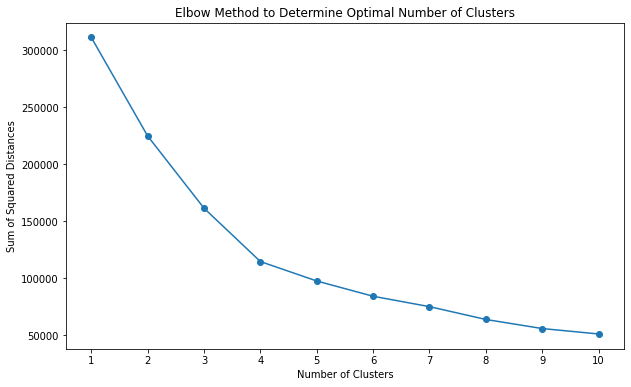

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X' is your features DataFrame

# Calculate SSD for a range of number of cluster
ssd = []
for num_clusters in range(1, 11):  # Let's test for 1 to 10 clusters, for instance
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot SSD for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(1, 11))
plt.show()

In [62]:
result_df = df1[['row_id', 'cluster','latitude', 'longitude']]
result_df.to_csv('../modeling/clustering_prediction.csv', index=False)

In [16]:
df1.groupby('precip_category_encoded').size()

precip_category_encoded
-0.800188    52700
 0.216152    31373
 1.232491     8790
 2.248831    10919
dtype: int64

In [63]:
import hvplot.pandas
scatter_plot = df1.hvplot.scatter(x='longitude', y='latitude', by='cluster')  

# Display the scatter plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [longitude]   (latitude)

In [18]:
df1[['precip_category_encoded']]

precip_category_encoded
0                      0.216152
1                      0.216152
2                      0.216152
3                     -0.800188
4                      0.216152
...                         ...
103777                -0.800188
103778                 1.232491
103779                 1.232491
103780                 0.216152
103781                 2.248831

[103782 rows x 1 columns]

In [21]:
df1.columns

Index(['crash_hour_category', 'contributing_factor', 'number_of_deaths',
       'number_of_injuries', 'severity_of_accident', 'humidity', 'preciptype',
       'snow', 'windspeed', 'visibility', 'severerisk', 'icon',
       'temperature_category', 'precip_category', 'humid_category',
       'wind_level', 'precip_category_encoded', 'crash_hour_category_encoded',
       'crash_hour_category_Early Morning', 'crash_hour_category_Late Night',
       'crash_hour_category_Other Hours', 'crash_hour_category_Rush Hours',
       'cluster'],
      dtype='object')

In [65]:
cluster_features = ['crash_hour_category_encoded', 'severity_category_encoded']

# Extract features for clustering
X = df1[cluster_features]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model
kmeans.fit(X)

# Predict the cluster for each instance in the DataFrame
df1.loc[:, 'cluster'] = kmeans.predict(X)

# Check the resulting clusters
print(df1['cluster'].value_counts())

import hvplot.pandas
scatter_plot = df1.hvplot.scatter(x='longitude', y='latitude', by='cluster')  

# Display the scatter plot
scatter_plot

cluster
0    47705
2    30185
1    16780
3     9112
Name: count, dtype: int64


:NdOverlay   [cluster]
   :Scatter   [longitude]   (latitude)